# Load Raw Data and Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling

In [2]:
H21RawData=pd.read_csv("../../data/raw/world-happiness-report-2021.csv")
H19RawData=pd.read_csv('../../data/raw/2019.csv')
H18RawData=pd.read_csv('../../data/raw/2018.csv')
H17RawData=pd.read_csv('../../data/raw/2017.csv')
H16RawData=pd.read_csv('../../data/raw/2016.csv')
H15RawData=pd.read_csv('../../data/raw/2015.csv')
LivCostRawData=pd.read_csv('../../data/raw/cost_of_living 2020.csv')
GDPRawData=pd.read_csv('../../data/raw/gdp.csv')
H20RawData=pd.read_csv('../../data/raw/world-happiness-report.csv')

# Rename Columns

In [3]:
H17RawData.rename(columns={'Happiness.Rank':'Happiness Rank',
                           'Happiness.Score':'Happiness Score',
                           'Economy..GDP.per.Capita.':'Economy (GDP per Capita)',
                          'Trust..Government.Corruption.':'Trust (Government Corruption)'}, inplace=True)

In [4]:
H18RawData.rename(columns={'Overall rank':'Happiness Rank',
                           'Country or region':'Country',
                           'Score':'Happiness Score',
                           'GDP per capita':'Economy (GDP per Capita)',
                           'Freedom to make life choices':'Freedom',
                          'Perceptions of corruption':'Trust (Government Corruption)'}, inplace=True)

In [5]:
H19RawData.rename(columns={'Overall rank':'Happiness Rank',
                           'Country or region':'Country',
                           'Score':'Happiness Score',
                           'GDP per capita':'Economy (GDP per Capita)',
                           'Freedom to make life choices':'Freedom',
                          'Perceptions of corruption':'Trust (Government Corruption)'}, inplace=True)

##### Use function to select columns that I want to explore 

In [6]:
def select_col (df):
    df=df[['Country','Happiness Rank','Happiness Score','Economy (GDP per Capita)','Freedom','Trust (Government Corruption)','Generosity']]
    return (df)

In [7]:
df15=select_col(H15RawData)
df16=select_col(H16RawData)
df17=select_col(H17RawData)
df18=select_col(H18RawData)
df19=select_col(H19RawData)

## Functions

In [8]:
year=['2015','2016','2017','2018','2019']
df=[df15,df16,df17,df18,df19]
df_list = []
for y,df in zip (year, df):
     df=df.assign(Year=y)
     df_list.append(df)
df_Master=pd.concat(df_list) 

In [9]:
df_Master.head(100)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,1,7.587,1.39651,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...
95,Bosnia and Herzegovina,96,4.949,0.83223,0.09245,0.00227,0.24808,2015
96,Lesotho,97,4.898,0.37545,0.31767,0.12504,0.16388,2015
97,Dominican Republic,98,4.885,0.89537,0.57672,0.14234,0.21684,2015
98,Laos,99,4.876,0.59066,0.59591,0.24249,0.42192,2015


# Clean Data

In [10]:
df_Master.isnull().sum(axis=0)  #DataFrame has one Null value

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Freedom                          0
Trust (Government Corruption)    1
Generosity                       0
Year                             0
dtype: int64

In [11]:
df_Master.isnull().sum().sum()

1

In [12]:
df_Master.shape

(782, 8)

In [13]:
df_Master.dropna(inplace=True)

In [14]:
df_Master.shape

(781, 8)

# Exploratory Data Analysis (EDA)

- Who: Which company/agency/organization provided this data?

- The World Happiness Report was downloaded from Kaggle and originated from the Gallup World Poll.

- What: What is in your data?

- All the data is in CSV format and includes the country, and other statistics.

- When: When was your data collected (for example, for which years)?
- Data collected from year 2015 to year 2019. The other two dataset include 2020 and 2021 data.

- Why: What is the purpose of your dataset? Is it for transparency/accountability, public interest, fun, learning, etc…

- The happiness report is often used for policy making and civil society



In [15]:
df_Master.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,781.0,78.773367,45.162398,1.000,40.00000,79.000,118.000000,158.000000
Happiness Score,781.0,5.377232,1.127071,2.693,4.50900,5.321,6.182000,7.769000
Economy (GDP per Capita),781.0,0.914537,0.405403,0.000,0.60500,0.982,1.233748,1.870766
Freedom,781.0,0.411254,0.152911,0.000,0.31048,0.431,0.531000,0.724000
Trust (Government Corruption),781.0,0.125436,0.105816,0.000,0.05400,0.091,0.156030,0.551910
Generosity,781.0,0.218618,0.122394,0.000,0.13000,0.202,0.279060,0.838075


In [16]:
df=[df15,df16,df17,df18,df19]
df_list = []
for df in df:
     df=df[df['Happiness Rank']<=10]
     df_list.append(df)
Top10=pd.concat(df_list) 

In [17]:
Top10List=Top10['Country'].unique()

In [18]:
print(Top10List)

['Switzerland' 'Iceland' 'Denmark' 'Norway' 'Canada' 'Finland'
 'Netherlands' 'Sweden' 'New Zealand' 'Australia' 'Austria']


In [19]:
print(f" During year 2015 to 2019 there are {len(Top10List)} countries have been ranked as Top 10 happiness in the world")

 During year 2015 to 2019 there are 11 countries have been ranked as Top 10 happiness in the world


In [20]:
Top10df=df_Master.loc[df_Master['Country'].isin (Top10List)]
Top10dfd

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,1,7.587,1.396510,0.665570,0.419780,0.296780,2015
1,Iceland,2,7.561,1.302320,0.628770,0.141450,0.436300,2015
2,Denmark,3,7.527,1.325480,0.649380,0.483570,0.341390,2015
3,Norway,4,7.522,1.459000,0.669730,0.365030,0.346990,2015
4,Canada,5,7.427,1.326290,0.632970,0.329570,0.458110,2015
5,Finland,6,7.406,1.290250,0.641690,0.413720,0.233510,2015
6,Netherlands,7,7.378,1.329440,0.615760,0.318140,0.476100,2015
7,Sweden,8,7.364,1.331710,0.659800,0.438440,0.362620,2015
8,New Zealand,9,7.286,1.250180,0.639380,0.429220,0.475010,2015
9,Australia,10,7.284,1.333580,0.651240,0.356370,0.435620,2015


# Data Analysis and Visualizations

In [21]:
Top10df.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Freedom,Trust (Government Corruption),Generosity
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,6.109091,7.404800,1.404147,0.612924,0.329320,0.349523
std,3.386644,0.143283,0.080319,0.039920,0.087402,0.086568
min,1.000000,7.006000,1.250180,0.532000,0.118000,0.153000
25%,3.000000,7.310000,1.340000,0.581825,0.293000,0.284500
50%,6.000000,7.406000,1.396000,0.614062,0.343000,0.341390
75%,9.000000,7.506500,1.457500,0.644345,0.393000,0.435580
max,13.000000,7.769000,1.616463,0.686000,0.483570,0.500005


Text(0.5, 1.0, 'Frequency of Ranking as Top 10 by Country')

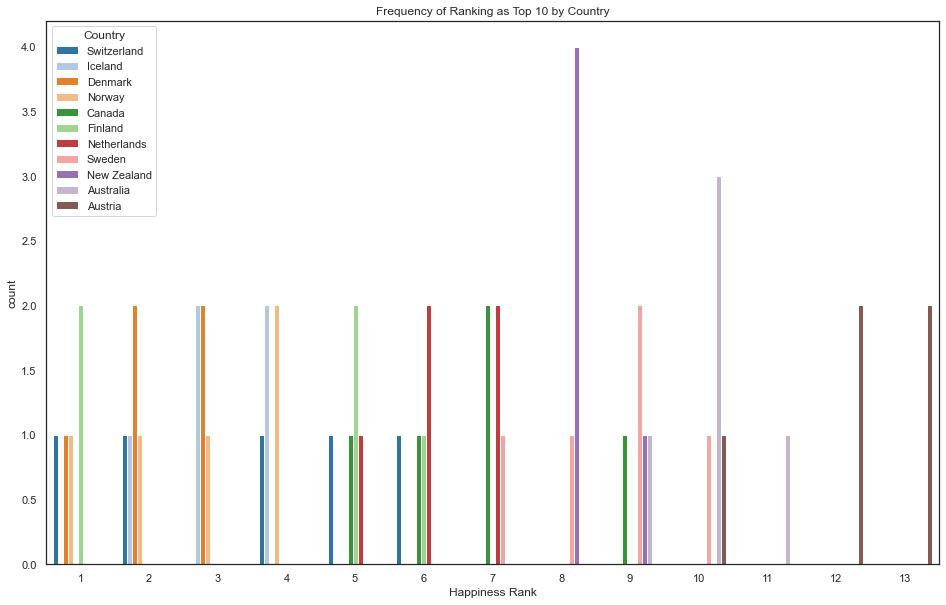

In [34]:
fig,ax=plt.subplots(figsize=(16,10))
sns.countplot(x = 'Happiness Rank', hue = 'Country',data = Top10df, palette = 'tab20')
plt.title('Frequency of Ranking as Top 10 by Country')

# This plot indicates how many times each country ranked as top 10
- Austria has been out of Top 10 four times however in year 2019 it backed to the Top 10 list
- Finland has been ranked as Top 1 twice 
- Denmark always in the Top 3

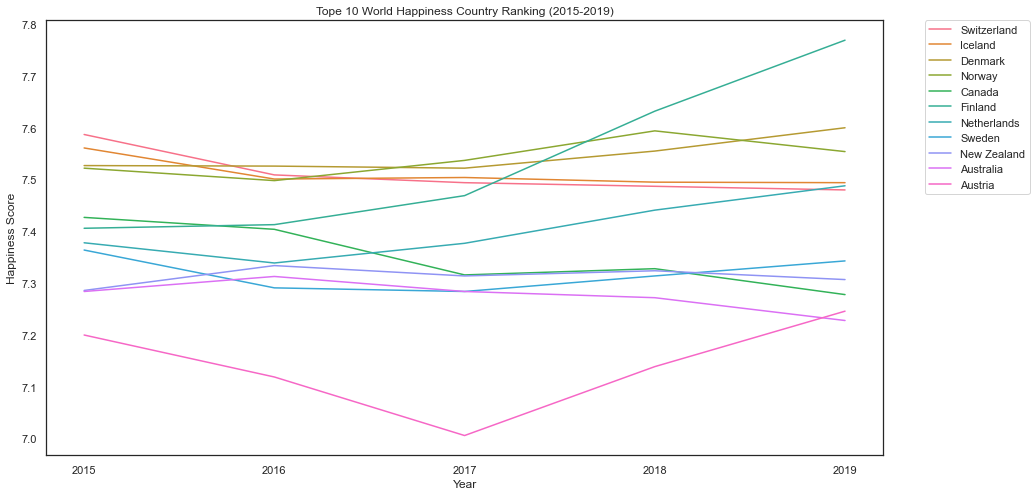

In [23]:
plt.figure(figsize=(15,8))
sns.set_theme(style='white')
ax=sns.lineplot(x='Year',y='Happiness Score',hue='Country',data=Top10df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.color_palette('tab10')
ax.set_title("Tope 10 World Happiness Country Ranking (2015-2019)")
plt.show()

## This is the trend analysis to show the Top 10 happiest countries in the world
- Total 11 countries were ranked top 10 during year 2015 to 2019 (the top 10 countries list didn't chagne much year over yer)
- The range of the happiness score is between 7 and 7.8 (rounded)
- Average GDP per Capita is 1.4
- Finland's happiness rank increased siginificantly since year 2017
- 2019 is Austria 1st time ranked as Top10
                                                                  

Text(0.5, 0.98, 'Tope 10 World Happiness Country Pairplot')

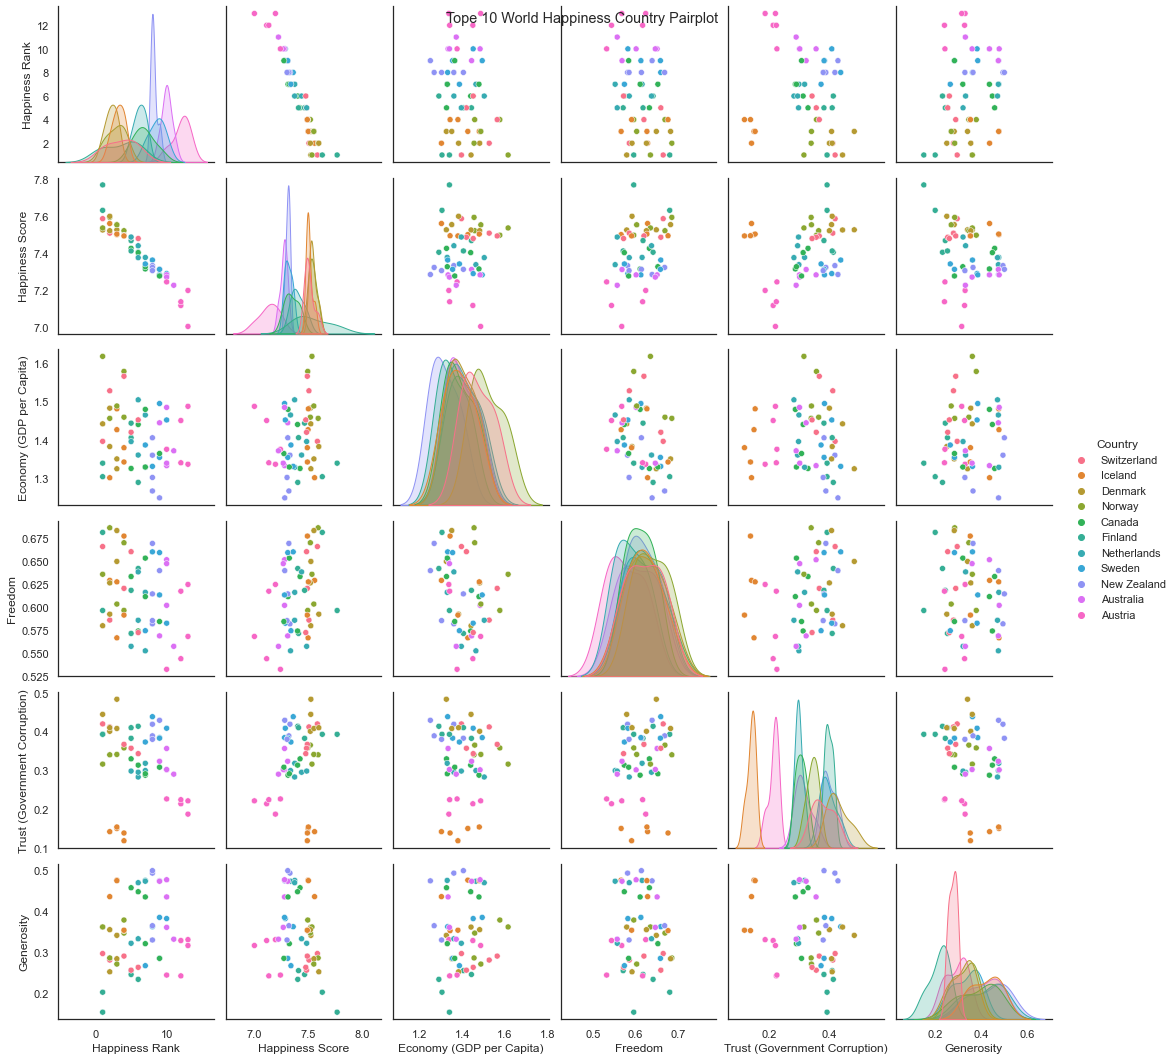

In [24]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
ax=sns.pairplot(Top10df,hue='Country')
ax.fig.suptitle("Tope 10 World Happiness Country Pairplot")

Text(0.5, 1.0, 'Happiness Score vs GDP per Capita')

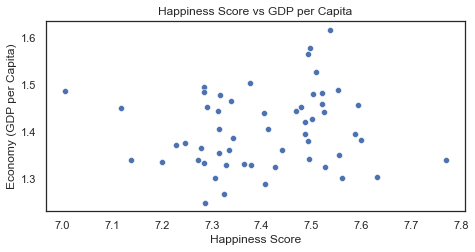

In [38]:
ax=sns.scatterplot(x='Happiness Score',y='Economy (GDP per Capita)',data=Top10df)
ax.set_title('Happiness Score vs GDP per Capita')

- **No strong positive linear releationship between "Happiness Score" and "GDP per Capita"**

Text(0.5, 1.0, 'Correlation Matrix Heapmap for All Country')

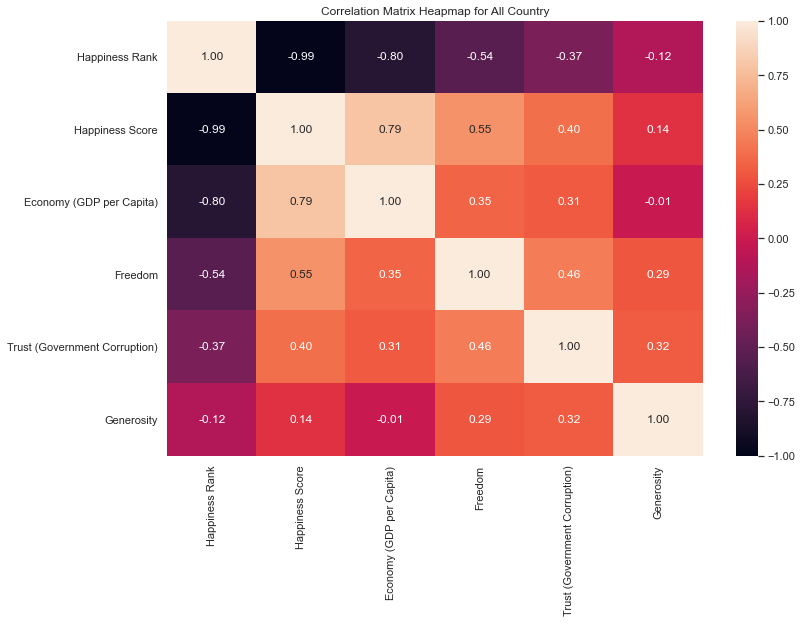

In [39]:
f, axes = plt.subplots(1, 1, figsize=(12, 8))
ax=sns.heatmap(df_Master.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")
ax.set_title('Correlation Matrix Heapmap for All Country')

# Correlation Matrix Heatmap -- All Country

- **Plot the master data set (including all the countries) among the 4 factors (Economy, Freedom, Trust, Generosity) the Economy has the highest positive correlation among the others**

Text(0.5, 1.0, 'Correlation Matrix Heatmap for Top 10 Country')

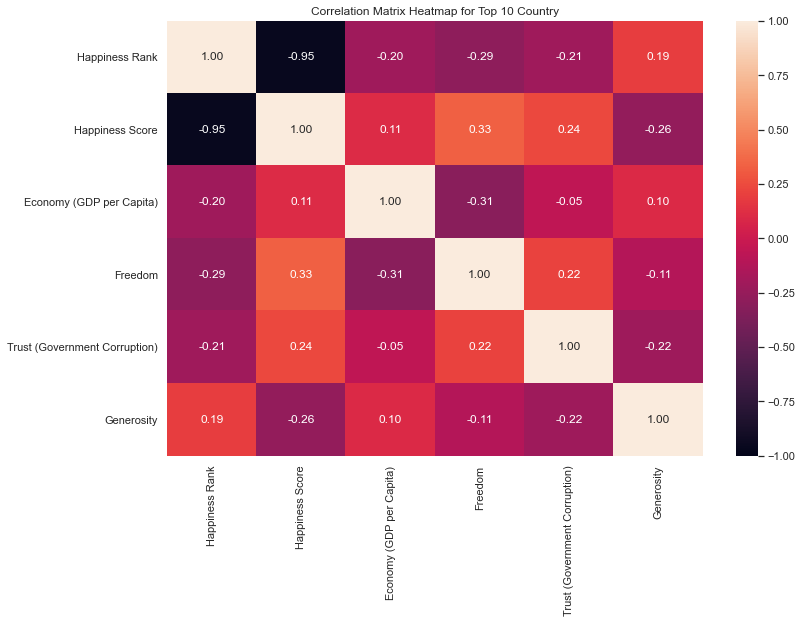

In [45]:
f, axes = plt.subplots(1, 1, figsize=(12, 8))
ax=sns.heatmap(Top10df.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")
ax.set_title('Correlation Matrix Heatmap for Top 10 Country')

# Correlation Matrix Heatmap -- Top 10 Country

- **Plot the Top 10 countries who ranked as the happiest countries in the world among the 4 factor (Economy, Freedom, Trust, Generosity) the Economy no longer the highest positive correlation among the others instead Freedom is the most important factor**

In [55]:
HP21CoL=pd.merge(H21RawData,LivCostRawData,how='left',on='Country') #Merge "World Happiness Report" with "Cost of Living"

In [57]:
HP21CoL

,Country,Regional indicator,Happiness Score,Standard error of ladder score,upperwhisker,lowerwhisker,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom,...,Dystopia + residual,Rank 2020,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,McMeal($),Unnamed: 9
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,...,3.253,20.0,72.71,25.89,49.91,59.61,77.75,93.94,9.52,NaN
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,...,2.868,6.0,85.02,33.10,59.74,65.85,95.71,101.27,12.63,NaN
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,...,2.839,2.0,125.69,51.20,89.41,124.93,118.55,114.83,15.36,NaN
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,...,2.967,4.0,90.19,38.54,65.04,80.91,97.17,74.78,13.31,NaN
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,...,2.798,17.0,74.63,35.59,55.62,57.81,76.09,86.76,9.52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,...,1.800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,...,0.648,81.0,39.13,9.75,24.82,34.01,39.11,66.79,0.00,NaN
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,...,1.095,102.0,36.21,14.64,25.71,29.74,30.74,20.54,0.00,NaN
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,...,1.205,49.0,54.06,10.31,32.75,48.47,39.36,22.59,0.00,NaN


In [58]:
HP21CoLTop10=HP21CoL.loc[HP21CoL['Country'].isin (Top10List)].reset_index() #subset dataframe for Top 10 country only

In [63]:
HP21CoLTop10

,index,Country,Regional indicator,Happiness Score,Standard error of ladder score,upperwhisker,lowerwhisker,Economy (GDP per Capita),Social support,Healthy life expectancy,...,Dystopia + residual,Rank 2020,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,McMeal($),Unnamed: 9
0,0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,...,3.253,20.0,72.71,25.89,49.91,59.61,77.75,93.94,9.52,NaN
1,1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,...,2.868,6.0,85.02,33.10,59.74,65.85,95.71,101.27,12.63,NaN
2,2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,...,2.839,2.0,125.69,51.20,89.41,124.93,118.55,114.83,15.36,NaN
3,3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,...,2.967,4.0,90.19,38.54,65.04,80.91,97.17,74.78,13.31,NaN
4,4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,...,2.798,17.0,74.63,35.59,55.62,57.81,76.09,86.76,9.52,NaN
5,5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.3,...,2.580,3.0,96.80,32.61,65.54,89.55,96.81,83.40,12.36,NaN
6,6,Sweden,Western Europe,7.363,0.036,7.433,7.293,10.867,0.934,72.7,...,2.683,22.0,72.31,25.86,49.69,63.62,71.03,94.04,9.36,NaN
7,8,New Zealand,North America and ANZ,7.277,0.040,7.355,7.198,10.643,0.948,73.4,...,2.612,23.0,71.83,31.74,52.31,66.29,63.05,87.22,8.36,NaN
8,9,Austria,Western Europe,7.268,0.036,7.337,7.198,10.906,0.934,73.3,...,2.784,24.0,71.78,26.32,49.64,63.63,66.24,79.38,9.52,NaN
9,10,Australia,North America and ANZ,7.183,0.041,7.265,7.102,10.796,0.940,73.9,...,2.598,16.0,75.89,34.18,55.58,70.62,68.88,103.38,8.80,NaN


Text(0.5, 1.08, 'PairPlot for Top 10 Country')

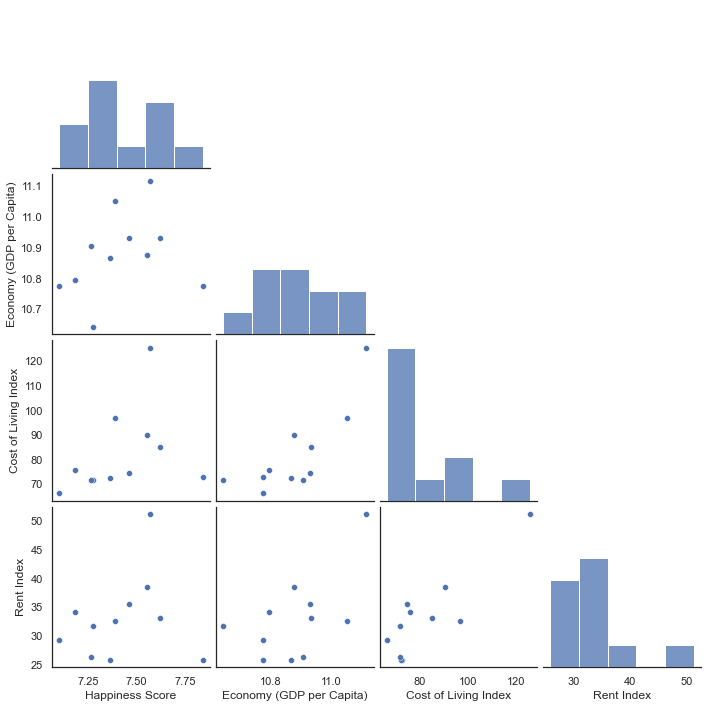

In [69]:
sns.pairplot(HP21CoLTop10[['Happiness Score','Economy (GDP per Capita)','Cost of Living Index','Rent Index']],corner=True)
fig.suptitle("PairPlot for Top 10 Country", y=1.08)

# PairPlot for Top 10 Country indicate one outliner with extraordinary high living cost among the countries -- Switzerland

In [73]:
HP21CoLTop10

,index,Country,Regional indicator,Happiness Score,Standard error of ladder score,upperwhisker,lowerwhisker,Economy (GDP per Capita),Social support,Healthy life expectancy,...,Dystopia + residual,Rank 2020,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,McMeal($),Unnamed: 9
0,0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,...,3.253,20.0,72.71,25.89,49.91,59.61,77.75,93.94,9.52,NaN
1,1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,...,2.868,6.0,85.02,33.10,59.74,65.85,95.71,101.27,12.63,NaN
2,2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,...,2.839,2.0,125.69,51.20,89.41,124.93,118.55,114.83,15.36,NaN
3,3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,...,2.967,4.0,90.19,38.54,65.04,80.91,97.17,74.78,13.31,NaN
4,4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,...,2.798,17.0,74.63,35.59,55.62,57.81,76.09,86.76,9.52,NaN
5,5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.3,...,2.580,3.0,96.80,32.61,65.54,89.55,96.81,83.40,12.36,NaN
6,6,Sweden,Western Europe,7.363,0.036,7.433,7.293,10.867,0.934,72.7,...,2.683,22.0,72.31,25.86,49.69,63.62,71.03,94.04,9.36,NaN
7,8,New Zealand,North America and ANZ,7.277,0.040,7.355,7.198,10.643,0.948,73.4,...,2.612,23.0,71.83,31.74,52.31,66.29,63.05,87.22,8.36,NaN
8,9,Austria,Western Europe,7.268,0.036,7.337,7.198,10.906,0.934,73.3,...,2.784,24.0,71.78,26.32,49.64,63.63,66.24,79.38,9.52,NaN
9,10,Australia,North America and ANZ,7.183,0.041,7.265,7.102,10.796,0.940,73.9,...,2.598,16.0,75.89,34.18,55.58,70.62,68.88,103.38,8.80,NaN


In [50]:
CoL10=LivCostRawData.loc[LivCostRawData['Country'].isin (Top10List)].reset_index()

In [47]:
H21RawData.rename(columns={'Country name':'Country',
                           'Ladder score':'Happiness Score',
                           'Logged GDP per capita':'Economy (GDP per Capita)',
                           'Freedom to make life choices':'Freedom',
                          'Perceptions of corruption':'Trust (Government Corruption)'}, inplace=True)

# Finland's happiness rank increased siginificantly since year 2017 but it's GDP per Capita decreased since 2018

In [29]:
HP21CoLTop10

In [83]:
Top10df=pd.merge(Top10df,HP21CoLTop10,how='left',on='Country')

Text(0.5, 1.0, 'Top 10 Happinest Country Distribution by Region')

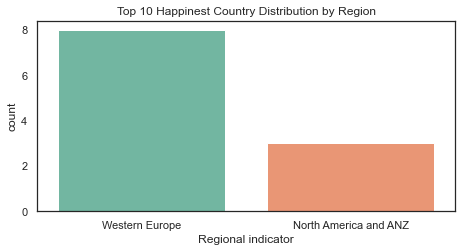

In [92]:

ax=sns.countplot(x='Regional indicator',data=HP21CoLTop10,palette='Set2')
ax.set_title('Top 10 Happinest Country Distribution by Region')

# Summary and conclusions

#### Summarize the findings and describe any conclusions and insights that draw from the visualizations.


- Summary of findings, insight, and conclusions
1. Austria has been out of Top 10 four times however in year 2019 it backed to the Top 10 list
2. Finland has been ranked as Top 1 twice and it's ranking of happiness significantly increased since year 2017.This is not driven by the GDP per Capita.It's high happiness score is mainly driven by the freedom of make life choice, relatively low living costs and high social support from the government.
3. Denmark always in the Top 3 among all the counties mainly driven by the combination of it's optimal mix of relative high GDP per capita, social support, freedom of make life choice, relatively low living costs

- Summary of findings, insight, and conclusions
1. When bring in all the countries as a whole picture, among the 4 factors (Economy, Freedom, Trust, Generosity) the Economy has the highest positive correlation among the others
2. However, when it comes to the top 10 most happiest countries in the world Economy is no longer an important factor to influence people's happiness. Instead freedom of make life choice becomes the No.1 kep important factor.
Research Question 2: What are the most important factor impact people happiness score.
    
- Summary of findings, insight, and conclusions
1. Most of the Top 10 happinest countries residence in Western Eruope region
2. Switzerland has an extraordinary high living cost among the countries in our top 10 list
3. Money is correlation to happiness but only to certain extent. It plays less important role when we have enough money and then what really bring happiness is something not money realted such as freedom, health etc. 
